In [7]:
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt

import pystan

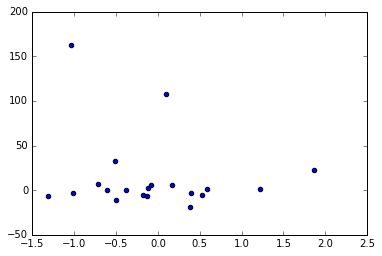

In [8]:
N = 20
predictors = np.random.randn(N)
noise = scipy.stats.t.rvs(df=1, size=N, scale=4.0)
observations = 2.0 * predictors - 1.5 + noise
plt.scatter(predictors, observations)
plt.show()

In [9]:
import pystan

In [10]:
model_code = """
data {
    real<lower=0> alpha_sigma;
    real<lower=0> beta_sigma;
    real<lower=0> sigma_sigma;

    real<lower=0> nu;

    int N;
    vector[N] x;
    vector[N] y;
}

parameters {
    real beta;
    real alpha;
    real<lower=0> sigma;
}

model {
    alpha ~ cauchy(0, alpha_sigma);
    beta  ~ cauchy(0, beta_sigma);
    sigma ~ cauchy(0, sigma_sigma);
    
    y ~ student_t(nu, beta * x + alpha, sigma);
}
"""
model = pystan.StanModel(model_code=model_code)

In [11]:
fit = model.sampling(data=dict(nu=1, N=N, x=predictors, y=observations, alpha_sigma=10, beta_sigma=10, sigma_sigma=10))

Inference for Stan model: anon_model_844359b2be33a9a3d86dd3979ff6531d.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta    2.49    0.09   2.93  -3.21   0.66   2.38    4.3   8.58  971.0    1.0
alpha  -0.59    0.07   2.15  -4.73   -2.0  -0.66   0.77   3.76 1020.0    1.0
sigma   6.57    0.07   2.12   3.43    5.1    6.2   7.69   11.4 1056.0    1.0
lp__  -63.44    0.05   1.42 -67.23 -64.07 -63.11  -62.4  -61.8  669.0    1.0

Samples were drawn using NUTS(diag_e) at Wed Mar  2 16:40:49 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


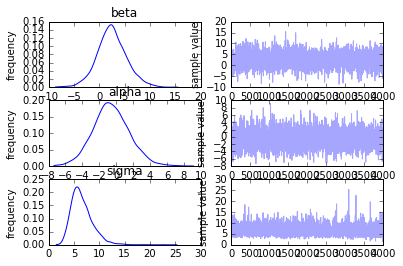

In [12]:
print fit
fit.plot();

In [13]:
samples = fit.extract()

In [14]:
alpha = samples['alpha'][:, np.newaxis]
beta  = samples['beta'][:, np.newaxis]
mx  = np.linspace(-3, 3)
yxx = np.outer(beta, mx) + alpha

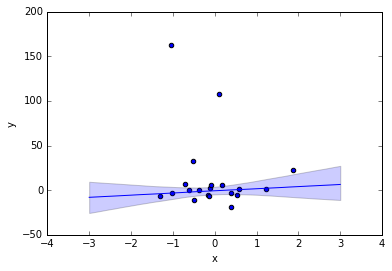

In [15]:
ymed = np.percentile(yxx,   50, axis=0)
ymin = np.percentile(yxx,  2.5, axis=0)
ymax = np.percentile(yxx, 97.5, axis=0)

plt.scatter(predictors, observations)
plt.plot(mx, ymed)
plt.fill_between(mx, ymin, ymax, alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

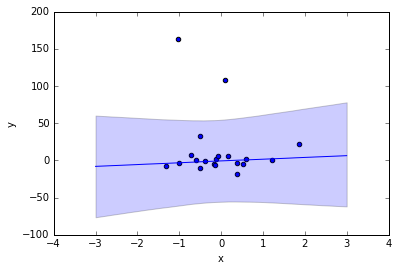

In [16]:
rv = scipy.stats.t(df=1, scale=4.0)

ymed = np.percentile(yxx,   50, axis=0)
ymin = np.percentile(yxx,  2.5, axis=0) + rv.ppf(0.025)
ymax = np.percentile(yxx, 97.5, axis=0) + rv.ppf(0.975)

plt.scatter(predictors, observations)
plt.plot(mx, ymed)
plt.fill_between(mx, ymin, ymax, alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()